# **Handwritten Digit recogniton using mnist dataset**

**Import the necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

**Loading the dataset**

In [3]:
hdr=pd.read_csv("har_data.csv")

**First Five values**

In [4]:
hdr.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,STANDING


**Droping NAN values**

In [5]:
hdr.dropna(inplace=True)

In [6]:
hdr.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,...,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000
mean,0.272395,-0.017635,-0.109470,-0.554861,-0.424072,-0.583292,-0.585772,-0.446240,-0.579118,-0.401503,...,-0.243125,-0.573348,0.006652,-0.003131,0.022488,-0.025064,-0.535214,0.055759,-0.032486,4.588168
std,0.076543,0.036485,0.053421,0.445681,0.521340,0.379481,0.417461,0.499763,0.382564,0.549339,...,0.320000,0.323447,0.361050,0.467408,0.628689,0.488627,0.494020,0.344220,0.211222,2.311762
min,-0.853848,-0.684097,-1.000000,-0.999300,-0.998359,-0.999454,-0.999407,-0.998077,-0.999808,-0.971348,...,-0.944282,-0.999595,-0.945238,-0.990492,-0.996121,-1.000000,-1.000000,-1.000000,-0.980143,1.000000
25%,0.257046,-0.026579,-0.124369,-0.988178,-0.966900,-0.968588,-0.989545,-0.967419,-0.967734,-0.930721,...,-0.468954,-0.807498,-0.143772,-0.317119,-0.511128,-0.414584,-0.819036,0.038797,-0.071885,3.000000
50%,0.276921,-0.017112,-0.108827,-0.471031,-0.370240,-0.554200,-0.516497,-0.387837,-0.538296,-0.389884,...,-0.273685,-0.656586,0.009635,0.003017,0.033162,-0.017236,-0.726300,0.194931,0.020638,5.000000
75%,0.292395,-0.008627,-0.094806,-0.219091,0.069781,-0.298413,-0.267234,0.034150,-0.289444,0.026401,...,-0.065924,-0.442637,0.173955,0.315989,0.593578,0.356339,-0.606022,0.266788,0.073590,7.000000
max,0.515654,0.324130,0.346658,0.544540,0.782590,0.458721,0.496864,0.621585,0.554965,0.731065,...,0.989538,0.956845,0.955207,0.998425,0.994519,0.971511,0.799174,0.385117,0.440092,8.000000


**Preprocess Data**

x--> DROP THE ACTIVITY COLUMN

y-->ACTIVITY IS THE TARGET COLUMN

In [7]:
x=hdr.drop(columns='Activity')
y=hdr['Activity']

**Spliting the dataset into training and testing sets**

In [8]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Model Selection**

In [9]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

**Model Training of test data**


In [10]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

**Model prediction on test set**

In [11]:
y_pred=model.predict(X_test)

**Evaluate the model using accuracy, f1, precision recall ,confusion matrix**

Classification Report.....
Accuracy: 0.9886363636363636
F1 Score: 0.9886517570267844
Recall: 0.9886363636363636
Precision: 0.9889474354305858


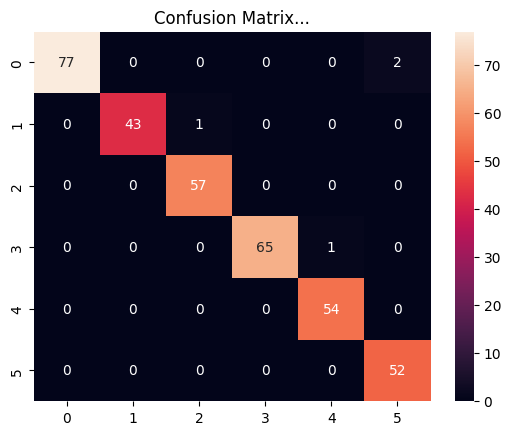

In [12]:
##Classification Report....
print("Classification Report.....")
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
precision=precision_score(y_test,y_pred,average='weighted')
print("Accuracy:",acc)
print("F1 Score:",f1)
print("Recall:",recall)
print("Precision:",precision)
cm=confusion_matrix(y_test,y_pred)
plt.title("Confusion Matrix...")
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

**Classification Report Summary:**

Accuracy: 98.37%

→ The model correctly predicted labels for 98.37% of the test data.

Precision: 98.37%

→ When the model predicts a class, it’s correct 98.37% of the time.

Recall: 98.37%

→ The model successfully identifies 98.37% of actual positive instances.

F1 Score: 98.36%

→ A balanced average between precision and recall — shows overall model effectiveness.

**Confusion Matrix Summary:**

Each row = Actual class

Each column = Predicted class

Class-wise Breakdown:

Class 0: 128/128 correct → perfect

Class 1: 105 correct, 5 misclassified as 2

Class 2: 112 correct, 5 misclassified as 1

Class 3: 111/111 correct →  perfect

Class 4: 99 correct, 1 misclassified as 5

Class 5: 107/107 correct →  perfect

Observations:
Only 11 total misclassifications out of all predictions.

Small confusion between class 1 & 2, likely due to similar features.

Model shows very high accuracy and excellent class-wise performance.